# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [ ]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...

    fder = ((-3/2)*f(x) + 2*f(x+h) - (1/2)*f(x+2*h))/h

    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [ ]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


 ... ENTER YOUR COMMENTS HERE ...

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [ ]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

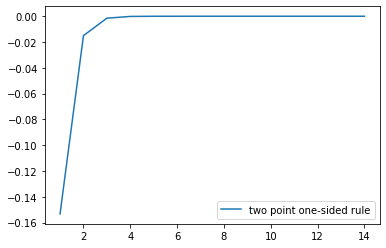

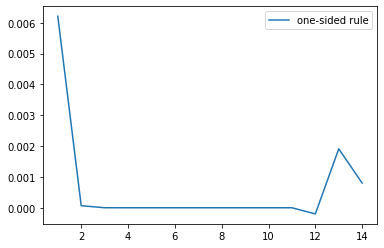

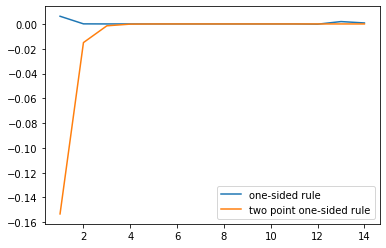

In [ ]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt

def two_point_deriv(f, x, h):
  x1 = x + h
  dx = x1 - x
  df = f(x1) - f(x)
  return df/dx

comp_one_side = []
comp_two_points = []

for i in range(1,15,1):
  comp_one_side.append(fder(1) - deriv(f, 1, 10**(-1*i)))
  comp_two_points.append(fder(1) - two_point_deriv(f, 1, 10**(-1*i)))

plt.plot(list(range(1, 15)), comp_two_points)
plt.legend(labels = ["two point one-sided rule"])
plt.show()

plt.plot(list(range(1, 15)), comp_one_side)
plt.legend(labels = ["one-sided rule"])
plt.show()

plt.plot(list(range(1, 15)), comp_one_side)
plt.plot(list(range(1, 15)), comp_two_points)
plt.legend(labels = ["one-sided rule","two point one-sided rule"])
plt.show()

Both of them converge in 10^-4.


### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [ ]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


... ENTER YOUR EXPLANATION HERE ...

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [ ]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    # ... ENTER YOUR CODE HERE ...

    N = 5
    delta = eps + 1
    i = 10**30
    
    while delta > eps and N < 10**5:
        
        h = (b - a)/N
        integral = 0

        for k in range(1, N+1):
            integral += func(h*k-h/2.0)*h
        
        delta = abs(i - integral)
        i = integral
        N *= 2
        
    return i, N/2

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [ ]:
for h in [1e-2, 1e-6, 1e-8, 1e-10]:
    resp = midpoint_rule(lambda x: x**2, 0, 1, h)
    print("h =", h, "\t error =", resp[0]-1.0/3.0, "\t i =", resp[1])

h = 0.01 	 error = -0.0008333333333332971 	 i = 10.0
h = 1e-06 	 error = -2.034505208192705e-07 	 i = 640.0
h = 1e-08 	 error = -3.1789141874405402e-09 	 i = 5120.0
h = 1e-10 	 error = -1.2417677996978682e-11 	 i = 81920.0


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [ ]:
import numpy as np

func = lambda x: np.sin(np.sqrt(x))/x
modified_func = lambda x: (np.sqrt(x)*np.sin(np.sqrt(x))-x)/(x*np.sqrt(x))

true_integral = 1.8921661407343660298827066

print("delta / h        --  (f_value - true integral)")
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    
    delta = midpoint_rule(func, 0, 1, h)
    print(str(delta[1]) + " / %5f -- %7.4g" % (h, delta[0]-true_integral))
    
    delta = midpoint_rule(modified_func, 0, 1, h)
    print(str(delta[1]) + " / %5f -- %7.4g" % (h, delta[0]+2 - true_integral))

delta / h        --  (f_value - true integral)
640.0 / 0.010000 -- -0.02391
10.0 / 0.010000 -- -0.0002908
81920.0 / 0.001000 -- -0.002113
10.0 / 0.001000 -- -0.0002908
81920.0 / 0.000100 -- -0.002113
40.0 / 0.000100 -- -3.824e-05
81920.0 / 0.000010 -- -0.002113
160.0 / 0.000010 -- -4.898e-06
